In [1]:
import pandas as pd
import numpy as np

# Set a seed so results are reproducible
np.random.seed(42)

# Generate dates for 1 month
dates = pd.date_range(start='2025-06-01', end='2025-07-01')

# Create empty list to hold rows
data = []

# Define 3 sample products
products = ['P001', 'P002', 'P003']

# Loop through each product and date to generate random demand data
for product in products:
    base_demand = np.random.randint(80, 120)  # base demand
    for date in dates:
        past_demand = base_demand + np.random.randint(-10, 10)
        price = np.random.randint(15, 25)
        promotion = np.random.choice([0, 1])  # 0 = no promo, 1 = promo
        data.append([date, product, past_demand, price, promotion])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Product_ID', 'Past_Demand', 'Price', 'Promotion'])

# Preview the first few rows
df.head()


,Date,Product_ID,Past_Demand,Price,Promotion
0,2025-06-01,P001,127,22,0
1,2025-06-02,P001,114,24,0
2,2025-06-03,P001,118,22,0
3,2025-06-04,P001,111,22,1
4,2025-06-05,P001,110,20,0


In [2]:
# Create synthetic target variable using a basic rule
df['Predicted_Demand'] = (
    df['Past_Demand'] +                # Start from past demand
    (df['Promotion'] * 5) -            # Promotions increase demand
    (df['Price'] * 0.3) +              # Higher price slightly reduces demand
    np.random.randint(-3, 3, size=len(df))  # Add some noise
)

# Round and convert to integer
df['Predicted_Demand'] = df['Predicted_Demand'].round().astype(int)

# Preview updated dataset
df.head()


,Date,Product_ID,Past_Demand,Price,Promotion,Predicted_Demand
0,2025-06-01,P001,127,22,0,122
1,2025-06-02,P001,114,24,0,104
2,2025-06-03,P001,118,22,0,110
3,2025-06-04,P001,111,22,1,106
4,2025-06-05,P001,110,20,0,105


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Encode 'Product_ID' to numeric
le = LabelEncoder()
df['Product_Code'] = le.fit_transform(df['Product_ID'])

# Step 2: Define Features (X) and Target (y)
X = df[['Past_Demand', 'Price', 'Promotion', 'Product_Code']]
y = df['Predicted_Demand']

# Step 3: Split data into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 2.46
Root Mean Squared Error (RMSE): 10.42


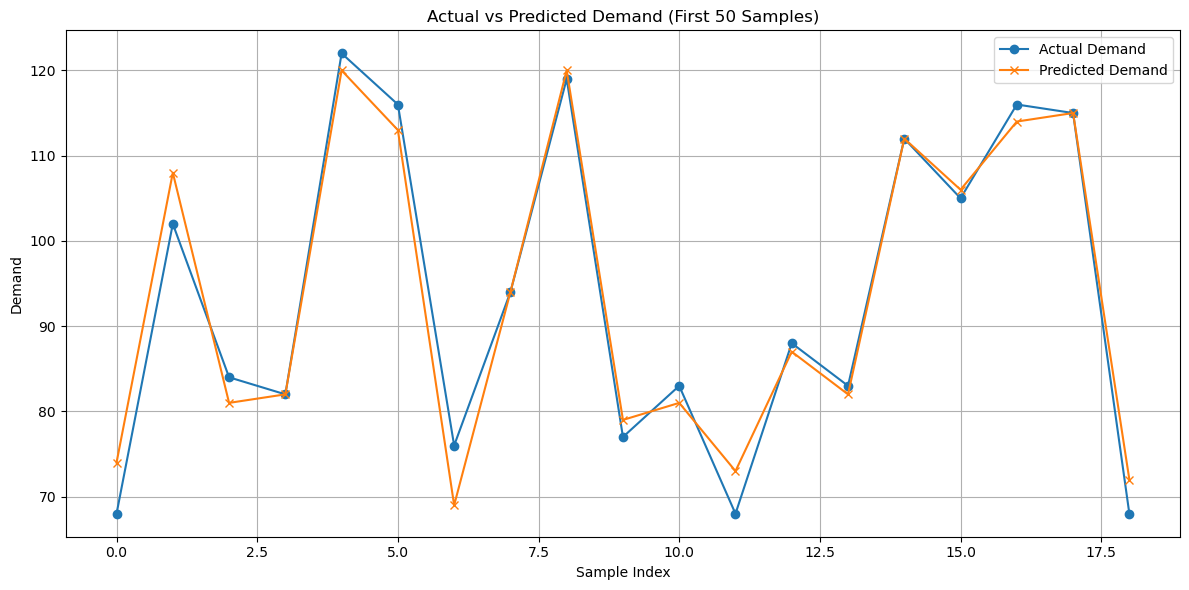

In [6]:
import matplotlib.pyplot as plt

# Create a comparison DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round()  # Round for clarity
}).reset_index(drop=True)

# Plot first 50 predictions
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'][:50], label='Actual Demand', marker='o')
plt.plot(results['Predicted'][:50], label='Predicted Demand', marker='x')
plt.title('Actual vs Predicted Demand (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import joblib
joblib.dump(model, "demand_model.pkl")


['demand_model.pkl']